YearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Country,,,,,,,,,,,,,
Australia,937.60,9017.71,14627.47,17055.29,333.400,13628.51,25164.77,4767.570,22489.20,5031.730,17150.53,6805.99,0.00
Austria,257.04,0.00,518.36,1708.12,680.780,1249.43,-24.20,1191.950,1516.08,0.000,1043.78,1329.78,683.20
Bahrain,0.00,0.00,0.00,0.00,0.000,548.40,0.00,0.000,0.00,0.000,0.00,0.00,0.00
Belgium,1809.91,1154.05,2161.32,3333.58,1954.150,2727.00,4273.17,2473.620,3536.12,4197.820,5651.38,6229.41,1409.43
Brazil,0.00,0.00,0.00,0.00,1143.600,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00
Canada,0.00,0.00,0.00,140.54,0.000,534.24,1171.46,1768.580,51.56,0.000,0.00,0.00,0.00
Channel Islands,363.53,645.08,1784.71,3509.33,293.000,903.79,2060.03,0.000,4882.63,1321.650,2623.32,1495.17,194.15
Cyprus,1587.07,547.50,4013.55,938.39,-35.800,0.00,1109.32,0.000,0.00,196.350,4153.97,439.66,-91.25
Czech Republic,0.00,0.00,549.26,0.00,-57.510,0.00,0.00,0.000,0.00,0.000,277.48,-61.51,0.00



✅ Average Order Value: 373.07

✅ % Contribution by Country:

Country
United Kingdom          81.501967
Netherlands              3.438556
EIRE                     3.019885
Germany                  2.675714
France                   2.375135
Australia                1.655003
Switzerland              0.673302
Spain                    0.661423
Belgium                  0.494182
Sweden                   0.441932
Japan                    0.426895
Norway                   0.424755
Portugal                 0.350253
Finland                  0.269695
Channel Islands          0.242512
Denmark                  0.226709
Italy                    0.204028
Cyprus                   0.155327
Austria                  0.122659
Singapore                0.110169
Poland                   0.087131
Israel                   0.084416
Greece                   0.056901
Iceland                  0.052062
Canada                   0.044288
Unspecified              0.032141
Malta                    0.030265
United Arab 

,TotalRevenue
Country,
United Kingdom,6747156.154000
Netherlands,284661.540000
EIRE,250001.780000
Germany,221509.470000
France,196626.050000
Australia,137009.770000
Switzerland,55739.400000
Spain,54756.030000
Belgium,40910.960000


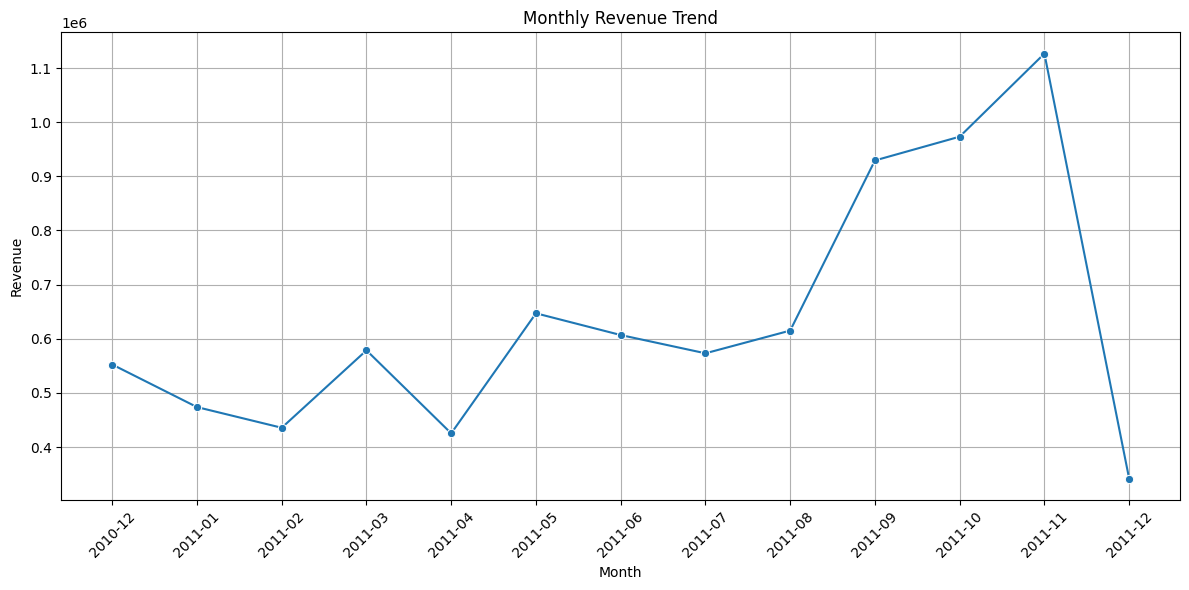

In [4]:
# Install required packages
!pip install openpyxl seaborn --quiet

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (use your file path here)
file_path = "/content/Online Retail.xlsx"  # Replace with your actual path
df = pd.read_excel(file_path)

# Step 3: Data Cleaning
df.dropna(inplace=True)                      # Remove rows with null values
df.drop_duplicates(inplace=True)             # Remove duplicate rows
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Add TotalPrice column

# Convert InvoiceDate to datetime and create YearMonth column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Step 4: Pivot Table - Total Sales by Country and Month
pivot_sales = pd.pivot_table(
    df,
    index='Country',
    columns='YearMonth',
    values='TotalPrice',
    aggfunc='sum',
    fill_value=0
)
display(pivot_sales)

# Step 5: Average Order Value (AOV)
order_totals = df.groupby('InvoiceNo')['TotalPrice'].sum()
avg_order_value = order_totals.mean()
print(f"\n Average Order Value: {avg_order_value:.2f}")

# Step 6: % Contribution of Each Country to Total Sales
country_sales = df.groupby('Country')['TotalPrice'].sum()
total_sales = country_sales.sum()
country_sales_pct = (country_sales / total_sales) * 100
country_sales_pct = country_sales_pct.sort_values(ascending=False)

print("\n  % Contribution by Country:\n")
print(country_sales_pct)

# Step 7: Highlight Top 5 Countries by Revenue (Style Display)
styled_country_sales = country_sales.sort_values(ascending=False).to_frame(name='TotalRevenue')

# Function to highlight top 5
def highlight_top_5(s):
    is_top_5 = s.rank(ascending=False) <= 5
    return ['background-color: lightgreen' if v else '' for v in is_top_5]

styled_display = styled_country_sales.style.apply(highlight_top_5, subset=['TotalRevenue'])
display(styled_display)

# Step 8: Monthly Revenue Trend Chart
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='TotalPrice', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()
